## **Data Daegu Apartment**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

### **Business Problem Understanding**

**Context**

Apartemen atau rumah pangsa merupakan sebuah jenis tempat tinggal yang hanya mencakup sebagian dari suatu bangunan, yang di dalamnya terdapat suatu fasilitas yang dapat di gunkanan oleh pemilik atau penyewa. Dari Ukuran tipe, Hallway serta akses ke subway akan menentukan harga dari apartement tersebut.

**Problem Statement**

Tahun pembuatan pada apartement dan harga jual serta fasilitas yang di dapatkan.

### **Data Understanding**

| **Attribute** | **Data Type** |
| --- | --- 
| HallwayType | Object 
| TimeToSubway | Object
| SubwayStation | Object
| N_FacilitiesNearBy(ETC) | int
| N_FacilitiesNearBy(PublicOffice) | int
| N_SchoolNearBy(University) | int
| N_Parkinglot(Basement) | int
| YearBuilt | int
| N_FacilitiesInApt | int
| Size(sqf) | int
| SalePrice | int

In [2]:
# Library

import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, plot_roc_curve

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

c:\Users\Even Graham\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [3]:
#Load Dataset
df = pd.read_csv("data_daegu_apartment.csv")
df

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0,3,2,1270,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1,5,1,0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1,7,3,56,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5,5,4,798,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0,1,2,536,2006,5,1743,311504
...,...,...,...,...,...,...,...,...,...,...,...
4118,terraced,0-5min,Sin-nam,0,3,2,475,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5,6,5,536,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2,5,0,76,1985,3,676,73451


In [4]:
# Count and Datatype for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   HallwayType                       4123 non-null   object
 1   TimeToSubway                      4123 non-null   object
 2   SubwayStation                     4123 non-null   object
 3   N_FacilitiesNearBy(ETC)           4123 non-null   int64 
 4   N_FacilitiesNearBy(PublicOffice)  4123 non-null   int64 
 5   N_SchoolNearBy(University)        4123 non-null   int64 
 6   N_Parkinglot(Basement)            4123 non-null   int64 
 7   YearBuilt                         4123 non-null   int64 
 8   N_FacilitiesInApt                 4123 non-null   int64 
 9   Size(sqf)                         4123 non-null   int64 
 10  SalePrice                         4123 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 354.4+ KB


In [5]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[mixed, corridor]"
1,TimeToSubway,object,0,0.0,5,"[5min~10min, no_bus_stop_nearby]"
2,SubwayStation,object,0,0.0,8,"[Kyungbuk_uni_hospital, Banwoldang]"
3,N_FacilitiesNearBy(ETC),int64,0,0.0,4,"[0, 5]"
4,N_FacilitiesNearBy(PublicOffice),int64,0,0.0,8,"[0, 4]"
5,N_SchoolNearBy(University),int64,0,0.0,6,"[3, 0]"
6,N_Parkinglot(Basement),int64,0,0.0,20,"[1321, 1174]"
7,YearBuilt,int64,0,0.0,16,"[2007, 1997]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[3, 8]"
9,Size(sqf),int64,0,0.0,89,"[1643, 1369]"


**TIDAK ADA MISSING VALUE**

Ketika di cek ternyata tidak ada Missing Value

In [6]:
df['TimeToSubway'].unique()

array(['0-5min', '10min~15min', '15min~20min', '5min~10min',
       'no_bus_stop_nearby'], dtype=object)

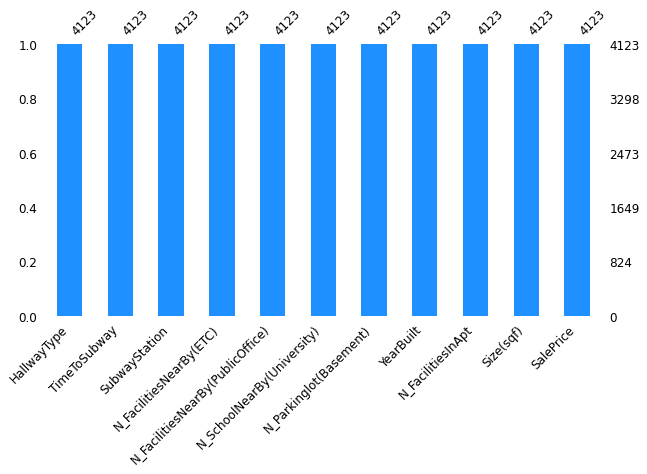

In [7]:
missingno.bar(df,color="dodgerblue", sort="ascending", figsize= (10,5), fontsize=12);

<AxesSubplot:>

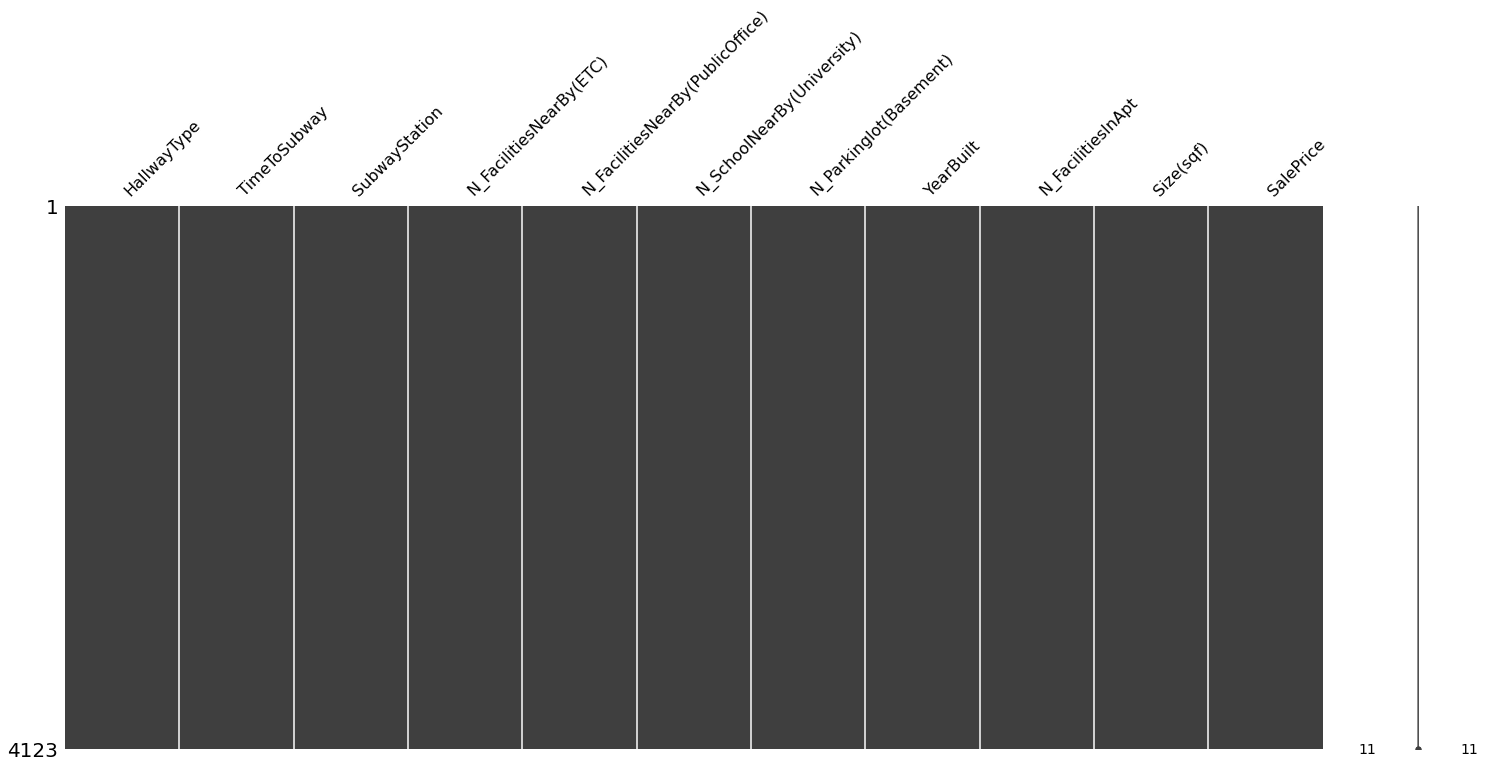

In [8]:
missingno.matrix(df)

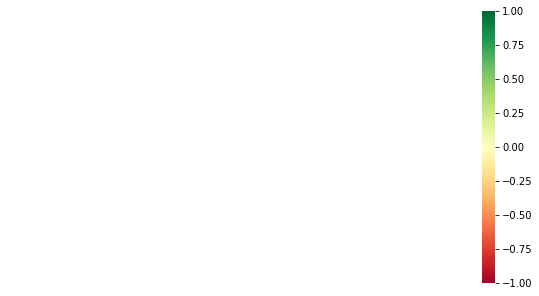

In [9]:
missingno.heatmap(df, cmap="RdYlGn", figsize=(10,5), fontsize=12);

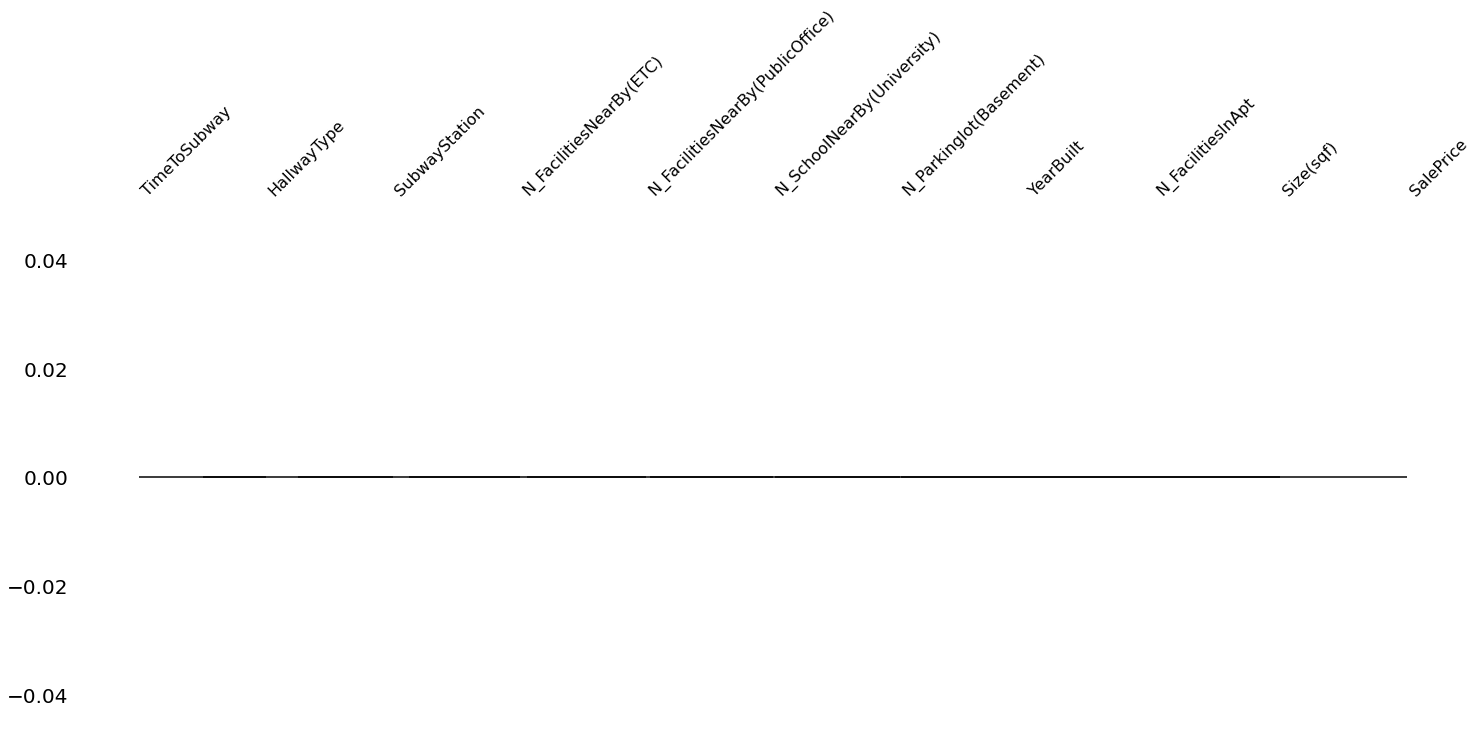

In [10]:
missingno.dendrogram(df)
plt.show()

#### **Exploratory Data Analysis**

**Data Daegu SalePrice Apartement**

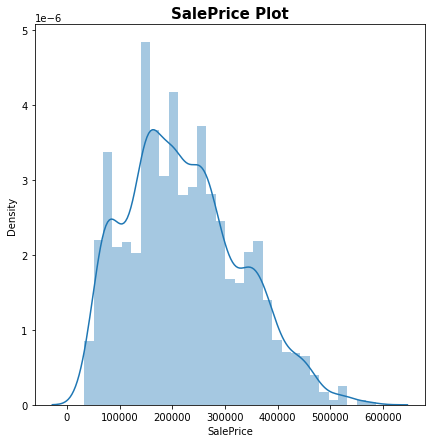

In [11]:
# Plot distribusi fitur 'price'
plt.figure(figsize=(7, 7))
sns.distplot(df['SalePrice'])
plt.title('SalePrice Plot', size=15, weight='bold');

Berdasarkan plot distribusi harga jual Apatement di atas, terlihat bahwa terdapat 'right-skewed distribution'. Dengan kata lain, terdapat skewness positif pada fitur price.

**Types of property related to price**

In [12]:
# Cek jumlah properti berdasarkan neighbourhood group dan tipenya
print(f"Jumlah properti di tiap SubwayStation group:\n{df['SubwayStation'].value_counts()}")
print(f"\nJumlah tiap HallwayType properti:\n{df['HallwayType'].value_counts()}")

Jumlah properti di tiap SubwayStation group:
Kyungbuk_uni_hospital    1152
Myung-duk                1044
Banwoldang                529
Bangoge                   502
Sin-nam                   467
no_subway_nearby          290
Chil-sung-market           74
Daegu                      65
Name: SubwayStation, dtype: int64

Jumlah tiap HallwayType properti:
terraced    2528
mixed       1131
corridor     464
Name: HallwayType, dtype: int64


Kebanyakan orang memiliki Apartement yang dekat dengan SubwayStation yang berlokasi di Kyungbuk_uni_hospital dan Myung-duk dengan HallwayType Terraced, Mixed dan Corridor

In [13]:
# Grouping tipe properti berdasarkan HallwayType
df.groupby(['SubwayStation', 'HallwayType'])['HallwayType'].count()

SubwayStation          HallwayType
Bangoge                mixed           502
Banwoldang             corridor         50
                       terraced        479
Chil-sung-market       mixed            74
Daegu                  corridor         51
                       terraced         14
Kyungbuk_uni_hospital  corridor         49
                       terraced       1103
Myung-duk              corridor        222
                       mixed           555
                       terraced        267
Sin-nam                corridor         51
                       terraced        416
no_subway_nearby       corridor         41
                       terraced        249
Name: HallwayType, dtype: int64

In [14]:
# Cek median SalePrice untuk tiap SubwayStation
df_median_price = df.groupby(by=['SubwayStation']).agg({'SalePrice':'median'}).reset_index()
df_median_price = df_median_price.set_index('SubwayStation')
df_median_price = df_median_price.sort_values('SalePrice', ascending =False)
df_median_price.head()

,SalePrice
SubwayStation,
Banwoldang,315929.0
Sin-nam,247787.0
Kyungbuk_uni_hospital,238938.0
no_subway_nearby,207743.0
Bangoge,167035.0


HallwayType,corridor,mixed,terraced
SubwayStation,,,
Bangoge,NaN,167035.0,NaN
Banwoldang,101769.0,NaN,337168.0
Chil-sung-market,NaN,88495.0,NaN
Daegu,70796.0,NaN,300884.0
Kyungbuk_uni_hospital,163716.0,NaN,244911.0
Myung-duk,65486.0,149557.0,271681.0
Sin-nam,87610.0,NaN,256637.0
no_subway_nearby,58407.0,NaN,243362.0


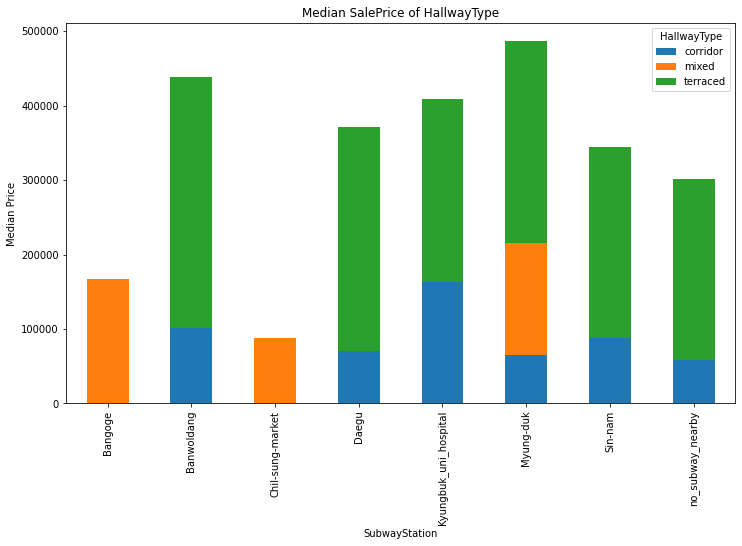

In [16]:
# Plot harga median untuk tiap tipe properti di setiap HallwayType
from IPython.display import display

neighbour_pivot = df.pivot_table(index='SubwayStation', columns='HallwayType', values='SalePrice', aggfunc='median')
display(neighbour_pivot)

pivot_plot = neighbour_pivot.plot.bar(stacked=True, figsize=(12, 7))
pivot_plot.set_xlabel('SubwayStation')
pivot_plot.set_ylabel('Median Price')
pivot_plot.set_title('Median SalePrice of HallwayType');

  Area Myung-duk memiliki harga median tertinggi untuk tiap HallwayType, yang dimana harga nya hampir menyentuh 490000.

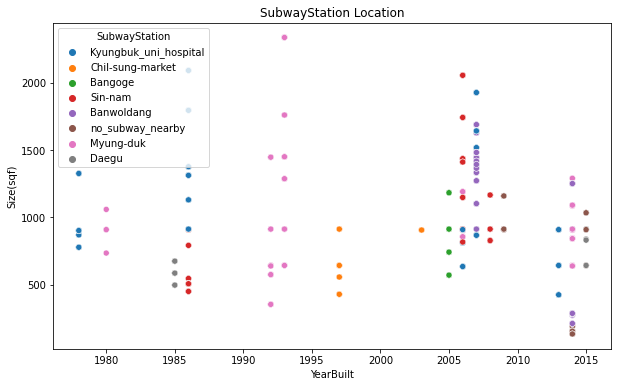

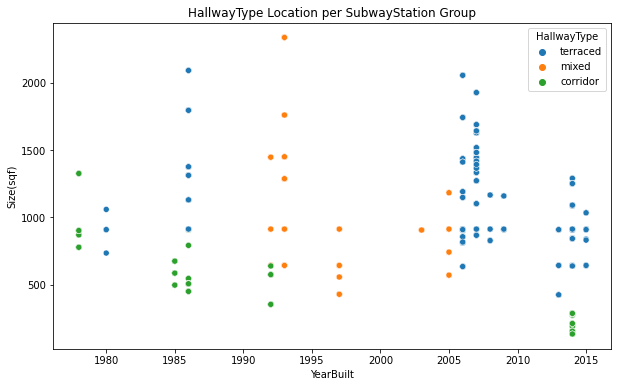

In [26]:
# Plot lokasi 'subwaystation'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['YearBuilt'], df['Size(sqf)'], hue=df['SubwayStation']).set_title('SubwayStation Location')

# Plot persebaran 'room_type'
plt.figure(figsize=(10, 6))
sns.scatterplot(df['YearBuilt'], df['Size(sqf)'], hue=df['HallwayType']).set_title('HallwayType Location per SubwayStation Group');

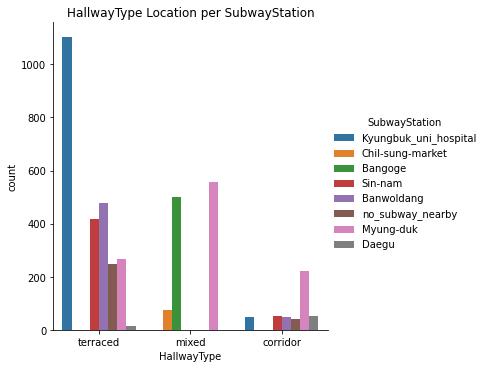

In [27]:
# Persebaran HallwayType berdasarkan SubwayStation
sns.catplot(x='HallwayType', kind='count', hue='SubwayStation', data=df);
plt.title('HallwayType Location per SubwayStation');

Mayoritas yang memilih Halwaytype adalah terraced berlokasi di Kyungbuk_uni_Hospital, sedangkan mayoritas Mixed Hallway Type berlokasi di Myung-duk. Hal ini dapat menjadi indikasi terkait preferensi pembeli, yang mana lebih banyak yang menyukai Terraced ataupun Mixed HallwayType daripada Corridor.

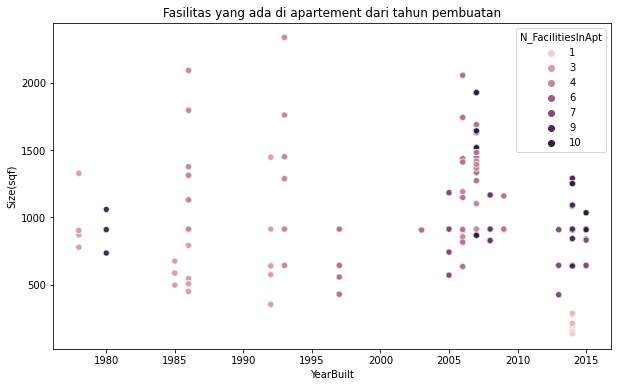

In [30]:
# Plot persebaran 'N_FacilitiesInApt'
plt.figure(figsize=(10,6))
sns.scatterplot(df['YearBuilt'], df['Size(sqf)'], hue=df['N_FacilitiesInApt']).set_title('Fasilitas yang ada di apartement dari tahun pembuatan');

In [31]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [32]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,HallwayType,object,0,0.0,3,"[terraced, corridor]"
1,TimeToSubway,object,0,0.0,5,"[no_bus_stop_nearby, 10min~15min]"
2,SubwayStation,object,0,0.0,8,"[Bangoge, Chil-sung-market]"
3,N_FacilitiesNearBy(ETC),int64,0,0.0,4,"[0, 5]"
4,N_FacilitiesNearBy(PublicOffice),int64,0,0.0,8,"[4, 0]"
5,N_SchoolNearBy(University),int64,0,0.0,6,"[0, 3]"
6,N_Parkinglot(Basement),int64,0,0.0,20,"[56, 181]"
7,YearBuilt,int64,0,0.0,16,"[2006, 1985]"
8,N_FacilitiesInApt,int64,0,0.0,9,"[7, 3]"
9,Size(sqf),int64,0,0.0,89,"[1387, 1796]"


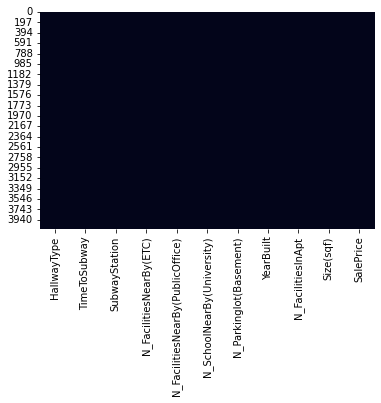

In [33]:
# Missing value heatmap
sns.heatmap(df_model.isnull(), cbar=False);

In [34]:
# Cek data duplikat
df_model.duplicated().sum()

1422

In [37]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['N_FacilitiesNearBy(ETC)', 'N_FacilitiesNearBy(PublicOffice)', 'N_SchoolNearBy(University)','N_Parkinglot(Basement)'], axis=1, inplace=True)

In [38]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4123 entries, 0 to 4122
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   HallwayType        4123 non-null   object
 1   TimeToSubway       4123 non-null   object
 2   SubwayStation      4123 non-null   object
 3   YearBuilt          4123 non-null   int64 
 4   N_FacilitiesInApt  4123 non-null   int64 
 5   Size(sqf)          4123 non-null   int64 
 6   SalePrice          4123 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 225.6+ KB


In [39]:
# Cek nilai missing value
df_model.isnull().sum()

HallwayType          0
TimeToSubway         0
SubwayStation        0
YearBuilt            0
N_FacilitiesInApt    0
Size(sqf)            0
SalePrice            0
dtype: int64

In [40]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000
mean,2002.999757,5.817851,954.630851,221767.926995
std,8.905768,2.340507,383.805648,106739.839945
min,1978.000000,1.000000,135.000000,32743.000000
25%,1993.000000,4.000000,644.000000,144752.000000
50%,2006.000000,5.000000,910.000000,209734.000000
75%,2008.000000,7.000000,1149.000000,291150.000000
max,2015.000000,10.000000,2337.000000,585840.000000


In [42]:
# Cek harga sewa yang bernilai 0
df_model[df_model['SalePrice'] == 0]['SalePrice'].count()

0

In [43]:
# Cek listing yang memiliki review kurang dari 2
df_model[df_model['number_of_reviews'] < 2]['number_of_reviews'].count()

KeyError: 'number_of_reviews'